In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

import pandas as pd
import seaborn as sns

##### Function for climatology and anomalies

In [3]:
def climo(ds):
    ds_climo = ds.groupby('time.month').mean(dim='time') # Calculating the climatology
    return ds_climo
def anoms(ds):
    ds_climo= ds.groupby('time.month').mean(dim='time') # Calculating the anomalies
    ds_anoms = ds.groupby('time.month')-ds_climo
    return ds_anoms

#### Read in monthly Actual Evapotranspiration data

In [4]:
file = '/scratch/ntavakol/ntavakol/aet/TerraClimate_aet_lat.nc'
ds_aet = xr.open_dataset(file)
ds_aet

<xarray.Dataset>
Dimensions:  (time: 120, lon: 8640, lat: 3597)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2020-12-01
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
  * lat      (lat) float64 89.98 89.94 89.9 89.85 ... -59.77 -59.81 -59.85
Data variables:
    aet      (time, lat, lon) float32 ...
Attributes: (12/51)
    CDI:                             Climate Data Interface version 1.9.10 (h...
    Conventions:                     CF-1.6
    source:                          WorldClim v2.0 (2.5m), CRU Ts4.0, JRA-55
    institution:                     University of California Merced
    method:                          These layers from TerraClimate were deri...
    title:                           TerraClimate: monthly climate and climat...
    ...                              ...
    geospatial_vertical_units:       None
    geospatial_vertical_resolution:  0.0
    geospatial_vertical_positive:    Up
    references:                      Abatzoglou, J.T., S.Z. Dobrowski, S.A. P...
    version:                         v1.0
    CDO:                             Climate Data Operators version 1.9.10 (h...

##### Selecting Case study (Australia)

In [5]:
ds_aet1=ds_aet.sel(lon=slice(113,154),lat=slice(-10,-44))
ds_aet1

<xarray.Dataset>
Dimensions:  (time: 120, lon: 984, lat: 816)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2020-12-01
  * lon      (lon) float64 113.0 113.1 113.1 113.1 ... 153.9 153.9 153.9 154.0
  * lat      (lat) float64 -10.02 -10.06 -10.1 -10.15 ... -43.9 -43.94 -43.98
Data variables:
    aet      (time, lat, lon) float32 ...
Attributes: (12/51)
    CDI:                             Climate Data Interface version 1.9.10 (h...
    Conventions:                     CF-1.6
    source:                          WorldClim v2.0 (2.5m), CRU Ts4.0, JRA-55
    institution:                     University of California Merced
    method:                          These layers from TerraClimate were deri...
    title:                           TerraClimate: monthly climate and climat...
    ...                              ...
    geospatial_vertical_units:       None
    geospatial_vertical_resolution:  0.0
    geospatial_vertical_positive:    Up
    references:                      Abatzoglou, J.T., S.Z. Dobrowski, S.A. P...
    version:                         v1.0
    CDO:                             Climate Data Operators version 1.9.10 (h...

### Read in monthly Southern Oscillation Index data

In [6]:
file = "/home/ntavakol/Assignment3/SOI.csv"
df = pd.read_csv(file)
df

,YEAR,MONTH,SOI
0,2011,1,1.7
1,2011,2,2.0
2,2011,3,1.8
3,2011,4,1.2
4,2011,5,0.4
...,...,...,...
115,2020,8,1.0
116,2020,9,1.3
117,2020,10,0.8
118,2020,11,1.1


#### Converting CSV file into an xarray. Dataset

In [7]:
start_date=str(df.YEAR[0])+'-'+str(df.MONTH[0])+'-01'
end_date=str(df.YEAR[119])+'-'+str(df.MONTH[119])+'-01'
print(start_date)
print(end_date)

2011-1-01
2020-12-01


In [8]:
dates=pd.date_range(start=start_date,end=end_date,freq='MS')
dates

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', length=120, freq='MS')

In [9]:
ds_index=xr.DataArray(df['SOI'],
                      coords={'time':dates},
                              dims=['time'])        
ds_index=ds_index.to_dataset(name='SOI')
ds_index

<xarray.Dataset>
Dimensions:  (time: 120)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2020-12-01
Data variables:
    SOI      (time) float64 1.7 2.0 1.8 1.2 0.4 0.6 ... 0.6 1.0 1.3 0.8 1.1 1.4

### Monthly AET Anomaly

#### Calculating the climatology for monthly averaged AET data

In [10]:
aet_climo_month = climo(ds_aet1)
aet_climo_month

<xarray.Dataset>
Dimensions:  (lon: 984, lat: 816, month: 12)
Coordinates:
  * lon      (lon) float64 113.0 113.1 113.1 113.1 ... 153.9 153.9 153.9 154.0
  * lat      (lat) float64 -10.02 -10.06 -10.1 -10.15 ... -43.9 -43.94 -43.98
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    aet      (month, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

#### Calculating monthly Anomalies for AET by subtracting the climatology from the original data

In [11]:
aet_anoms_month = anoms(ds_aet1)
aet_anoms_month

<xarray.Dataset>
Dimensions:  (time: 120, lon: 984, lat: 816)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2020-12-01
  * lon      (lon) float64 113.0 113.1 113.1 113.1 ... 153.9 153.9 153.9 154.0
  * lat      (lat) float64 -10.02 -10.06 -10.1 -10.15 ... -43.9 -43.94 -43.98
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    aet      (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

#### Calculating 15 and 85 percentages of SOI to determine a threshold for El Nino, La Nino, and Neutral phases

In [12]:
np.quantile(ds_index['SOI'], 0.15)

-0.7300000000000004

In [13]:
np.quantile(ds_index['SOI'], 0.85)

1.0

In [14]:
elnino = ds_index['SOI'].where(ds_index['SOI']<=-0.73)
lanina = ds_index['SOI'].where(ds_index['SOI']>=1.0)
neutral=ds_index['SOI'].where((ds_index['SOI']>-0.73) & (ds_index['SOI']<1.0))

In [15]:
elnino 

<xarray.DataArray 'SOI' (time: 120)>
array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan, -1. ,  nan, -0.9, -1.1, -1.8, -1.9, -1.7,
       -2.2, -2.2, -2.1, -2.1, -3.2, -1.8, -2.6, -1.2, -1. ,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan, -1. ,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan, -1.4, -1.2,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan])
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2020-12-01

In [16]:
lanina 

<xarray.DataArray 'SOI' (time: 120)>
array([1.7, 2. , 1.8, 1.2, nan, nan, nan, nan, 1. , 1.2, 1.4, 1.3, 1.8,
       1.5, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.1,
       nan, nan, 1.2, 1.2, 1. , nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, 1.5, nan, 1.3, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1. , 1.3,
       nan, 1.1, 1.4])
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2020-12-01

In [17]:
neutral

<xarray.DataArray 'SOI' (time: 120)>
array([ nan,  nan,  nan,  nan,  0.4,  0.6,  0.4,  0.5,  nan,  nan,  nan,
        nan,  nan,  nan,  0.1,  0.2,  0.1,  0. , -0.2,  0.2,  0.4,  0.4,
        0.6,  0.6,  0. ,  nan,  0.3,  0.8,  nan,  nan,  nan,  0.5,  0.5,
        0. ,  0.6,  0.8, -0.2,  0. ,  0. , -0.6,  0.4,  0.2,  0.1,  0.1,
       -0.1,  0.1,  0. , -0.1,  nan, -0.5,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  0. , -0.1,
        0.3,  0.4,  0.6,  0.2,  0.2,  0.5,  0.8,  0.1,  0. ,  nan,  0.2,
       -0.1,  0.2,  0.5,  0.5,  0.3,  nan,  0.9,  nan,  0.5,  0.1,  0.9,
        0.6,  0.1,  0.4,  0.4, -0.7, -0.3, -0.6, -0.2, -0.6,  nan,  nan,
        0. , -0.5, -0.3, -0.2,  0. , -0.1,  0.1, -0.3,  0. , -0.1, -0.6,
        0.4,  0.3,  0.8,  0.6,  0.6,  nan,  nan,  0.8,  nan,  nan])
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2020-12-01

#### Calculating a composites of AET based on the Southern Oscillation Index (SOI)

##### Substituting time dimension with string in AET

##### The time dimension of AET and SOI index are different, so in order to match them, we will substitute the time dimension with strings.

In [18]:
aet_anoms_month['time']=['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01', '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01', '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
                 '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01', '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01', '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
                 '2013-01-01', '2013-02-010', '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01', '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
                 '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
                 '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
                 '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
                 '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
                 '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
                 '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
                 '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-010', '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01']

In [19]:
aet_anoms_month

<xarray.Dataset>
Dimensions:  (time: 120, lon: 984, lat: 816)
Coordinates:
  * time     (time) <U11 '2011-01-01' '2011-02-01' ... '2020-11-01' '2020-12-01'
  * lon      (lon) float64 113.0 113.1 113.1 113.1 ... 153.9 153.9 153.9 154.0
  * lat      (lat) float64 -10.02 -10.06 -10.1 -10.15 ... -43.9 -43.94 -43.98
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    aet      (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

##### Substituting time dimension with string for El Nino

In [20]:
elnino['time']=['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01', '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01', '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
                 '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01', '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01', '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
                 '2013-01-01', '2013-02-010', '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01', '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
                 '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
                 '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
                 '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
                 '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
                 '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
                 '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
                 '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-010', '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01']

In [21]:
elnino

<xarray.DataArray 'SOI' (time: 120)>
array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan, -1. ,  nan, -0.9, -1.1, -1.8, -1.9, -1.7,
       -2.2, -2.2, -2.1, -2.1, -3.2, -1.8, -2.6, -1.2, -1. ,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan, -1. ,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan, -1.4, -1.2,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan])
Coordinates:
  * time     (time) <U11 '2011-01-01' '2011-02-01' ... '2020-11-01' '2020-12-01'

##### Substituting time dimension with string for La Nino

In [22]:
lanina['time']=['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01', '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01', '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
                 '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01', '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01', '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
                 '2013-01-01', '2013-02-010', '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01', '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
                 '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
                 '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
                 '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
                 '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
                 '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
                 '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
                 '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-010', '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01']

In [23]:
lanina

<xarray.DataArray 'SOI' (time: 120)>
array([1.7, 2. , 1.8, 1.2, nan, nan, nan, nan, 1. , 1.2, 1.4, 1.3, 1.8,
       1.5, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.1,
       nan, nan, 1.2, 1.2, 1. , nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, 1.5, nan, 1.3, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1. , 1.3,
       nan, 1.1, 1.4])
Coordinates:
  * time     (time) <U11 '2011-01-01' '2011-02-01' ... '2020-11-01' '2020-12-01'

#### Substituting time dimension with string for neutral

In [24]:
neutral['time']=['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01', '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01', '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
                 '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01', '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01', '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
                 '2013-01-01', '2013-02-010', '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01', '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
                 '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
                 '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
                 '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
                 '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
                 '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
                 '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
                 '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-010', '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01']

In [25]:
neutral

<xarray.DataArray 'SOI' (time: 120)>
array([ nan,  nan,  nan,  nan,  0.4,  0.6,  0.4,  0.5,  nan,  nan,  nan,
        nan,  nan,  nan,  0.1,  0.2,  0.1,  0. , -0.2,  0.2,  0.4,  0.4,
        0.6,  0.6,  0. ,  nan,  0.3,  0.8,  nan,  nan,  nan,  0.5,  0.5,
        0. ,  0.6,  0.8, -0.2,  0. ,  0. , -0.6,  0.4,  0.2,  0.1,  0.1,
       -0.1,  0.1,  0. , -0.1,  nan, -0.5,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  0. , -0.1,
        0.3,  0.4,  0.6,  0.2,  0.2,  0.5,  0.8,  0.1,  0. ,  nan,  0.2,
       -0.1,  0.2,  0.5,  0.5,  0.3,  nan,  0.9,  nan,  0.5,  0.1,  0.9,
        0.6,  0.1,  0.4,  0.4, -0.7, -0.3, -0.6, -0.2, -0.6,  nan,  nan,
        0. , -0.5, -0.3, -0.2,  0. , -0.1,  0.1, -0.3,  0. , -0.1, -0.6,
        0.4,  0.3,  0.8,  0.6,  0.6,  nan,  nan,  0.8,  nan,  nan])
Coordinates:
  * time     (time) <U11 '2011-01-01' '2011-02-01' ... '2020-11-01' '2020-12-01'

#### Selecting AET data that match El Nino, La Nina, and Neutral

In [26]:
elnino_aet = aet_anoms_month.sel(time=elnino.dropna(dim='time')['time']).mean(dim='time')
elnino_aet

<xarray.Dataset>
Dimensions:  (lon: 984, lat: 816)
Coordinates:
  * lon      (lon) float64 113.0 113.1 113.1 113.1 ... 153.9 153.9 153.9 154.0
  * lat      (lat) float64 -10.02 -10.06 -10.1 -10.15 ... -43.9 -43.94 -43.98
Data variables:
    aet      (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

In [27]:
neutral_aet = aet_anoms_month.sel(time=neutral.dropna(dim='time')['time']).mean(dim='time')
neutral_aet

<xarray.Dataset>
Dimensions:  (lon: 984, lat: 816)
Coordinates:
  * lon      (lon) float64 113.0 113.1 113.1 113.1 ... 153.9 153.9 153.9 154.0
  * lat      (lat) float64 -10.02 -10.06 -10.1 -10.15 ... -43.9 -43.94 -43.98
Data variables:
    aet      (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

In [28]:
lanina_aet = aet_anoms_month.sel(time=lanina.dropna(dim='time')['time']).mean(dim='time')
lanina_aet

<xarray.Dataset>
Dimensions:  (lon: 984, lat: 816)
Coordinates:
  * lon      (lon) float64 113.0 113.1 113.1 113.1 ... 153.9 153.9 153.9 154.0
  * lat      (lat) float64 -10.02 -10.06 -10.1 -10.15 ... -43.9 -43.94 -43.98
Data variables:
    aet      (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

In [29]:
comp_aet = [elnino_aet['aet'],lanina_aet['aet'],neutral_aet['aet']]
comp_aet

[<xarray.DataArray 'aet' (lat: 816, lon: 984)>
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
 Coordinates:
   * lon      (lon) float64 113.0 113.1 113.1 113.1 ... 153.9 153.9 153.9 154.0
   * lat      (lat) float64 -10.02 -10.06 -10.1 -10.15 ... -43.9 -43.94 -43.98,
 <xarray.DataArray 'aet' (lat: 816, lon: 984)>
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
 Coordinates:
   * lon      (lon) float64 113.0 113.1 113.1 113.1 ... 153.9 153.9 153.9 154.0
   * lat      (lat) float64 -10.02 -10.0

#### How many months do we have with El Nino, La Nina, and Neutral?

In [30]:
print('El Nino: ',elnino.count(dim='time').values)
print('Neutral: ',neutral.count(dim='time').values)
print('La Nina: ',lanina.count(dim='time').values)

counts=[elnino.count(dim='time').values,
        lanina.count(dim='time').values,
        lanina.count(dim='time').values]
print(counts)

El Nino:  18
Neutral:  82
La Nina:  20
[array(18), array(20), array(20)]


##### Plotting Composite

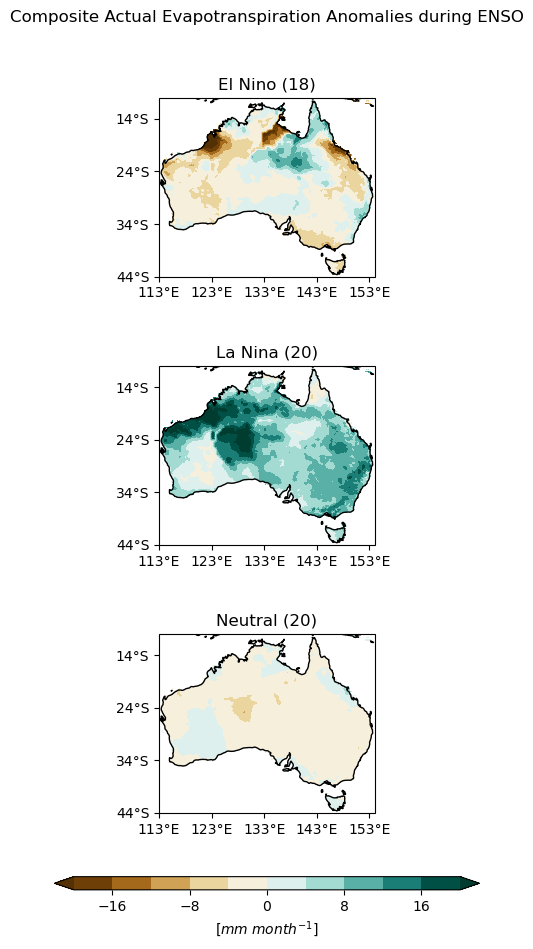

In [31]:
labels=['El Nino','La Nina', 'Neutral']
clevs = np.arange(-20.0,24.0,4)
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=3,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))
# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array (just 3 rows)
axs = axs.flatten()

#Loop over all of the seasons and plot
for i,enso in enumerate(comp_aet):

        # Select the season
        data = comp_aet[i]
 # Add the cyclic point
        data,lons = add_cyclic_point(data,coord=comp_aet[i]['lon'])

 # Contour plot
        cs=axs[i].contourf(lons,comp_aet[i]['lat'],data,clevs,
                    transform = ccrs.PlateCarree(),
                    cmap='BrBG',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(113,154,10), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-44,-10,10), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(labels[i]+' ('+str(counts[i])+')')

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.012])

# Draw the colorbar
cbar = fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='[$mm\;month^{-1}$]')

# Add a big title at the top
plt.suptitle('Composite Actual Evapotranspiration Anomalies during ENSO') 
plt.savefig('Composite Actual Evapotranspiration Anomalies during ENSO.png', dpi=300, bbox_inches='tight');